In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


import warnings 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, normalize

from sklearn.cluster import KMeans

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
x = df.iloc[: , :-1].values

## K-means

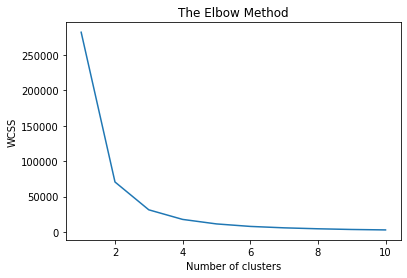

In [10]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
kmeans = KMeans(n_clusters=3,init = 'k-means++',   max_iter = 100, n_init = 10, random_state = 0)

In [12]:
y_kmeans = kmeans.fit_predict(x)

In [13]:
print(kmeans.cluster_centers_) 

[[ 25.5     5.006   3.418   1.464   0.244]
 [125.5     6.588   2.974   5.552   2.026]
 [ 75.5     5.936   2.77    4.26    1.326]]


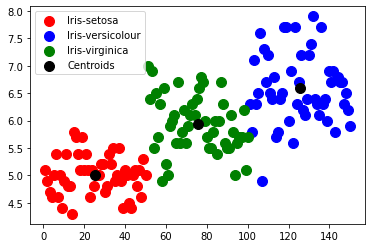

In [14]:
plt.scatter(x[y_kmeans   == 0, 0], x[y_kmeans == 0, 1],s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans   == 1, 0], x[y_kmeans == 1, 1],s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans   == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')   #Visualising the clusters - On the first two columns
plt.scatter(kmeans.cluster_centers_[:,   0], kmeans.cluster_centers_[:,1],s = 100, c = 'black', label = 'Centroids')   #plotting the centroids of the clusters
plt.legend()
plt.show()

## Agglomerative Clustering

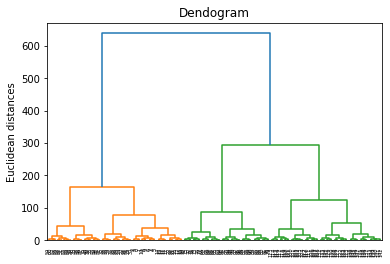

In [17]:
dendogram=sch.dendrogram(sch.linkage(x,method='ward')) 
plt.title('Dendogram')
plt.ylabel('Euclidean distances')
plt.show()

In [18]:
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(x)

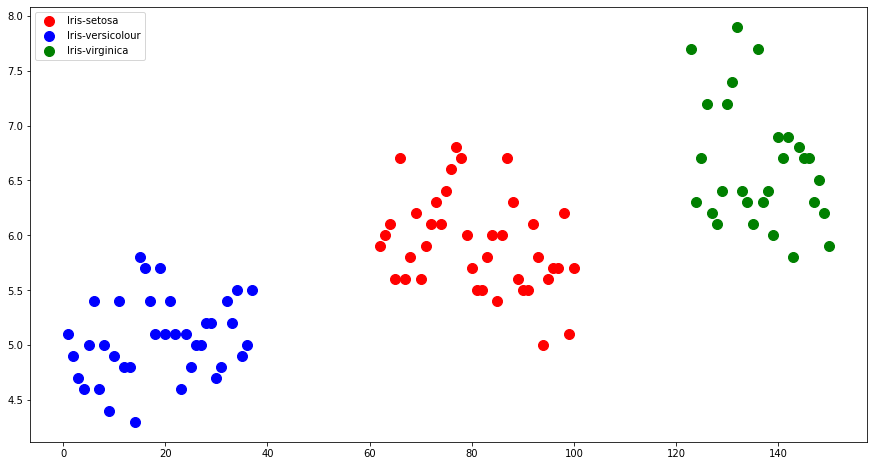

In [23]:
fig = plt.figure(figsize = (15,8))
plt.scatter(x[y_hc==0,0],x[y_hc==0,1],s=100,c='red',label='Iris-setosa')
plt.scatter(x[y_hc==1,0],x[y_hc==1,1],s=100,c='blue',label='Iris-versicolour')
plt.scatter(x[y_hc==2,0],x[y_hc==2,1],s=100,c='green',label='Iris-virginica')
plt.legend()
plt.ioff()
plt.show()

## GitHub Link